4/4 [==============================] - 0s 7ms/step - loss: 446.6127 - mae: 20.2261
Test Loss: 446.6126708984375, Test MAE: 20.226102828979492
4/4 [==============================] - 0s 3ms/step


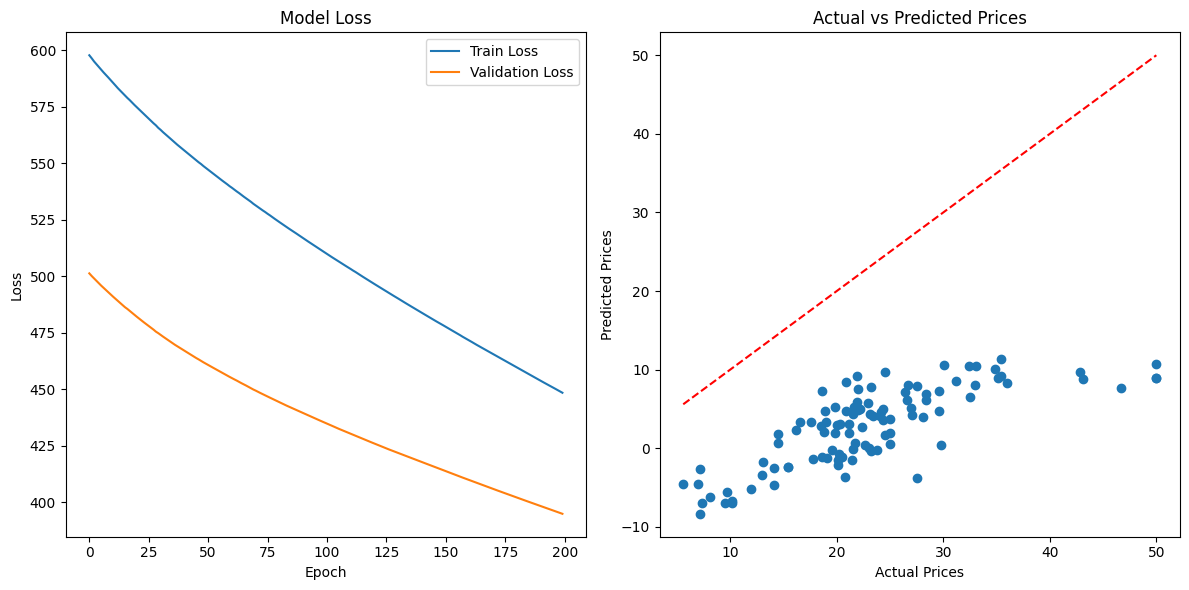

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data (feature scaling)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Build the model
model = models.Sequential([
    layers.Dense(1, input_shape=(train_data.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(train_data, train_targets, epochs=200, validation_split=0.1, verbose=0)

# Evaluate the model
test_loss, test_mae = model.evaluate(test_data, test_targets)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict the house prices on test data
predictions = model.predict(test_data).flatten()

# Visualization
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot actual vs predicted prices
plt.subplot(1, 2, 2)
plt.scatter(test_targets, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], color='red', linestyle='--')

plt.tight_layout()
plt.show()